In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import tensorflow as tf
tf.__version__

'2.6.2'

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/Tabular%20Playground%20Series%20-%20Jan%202022/train.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26298 entries, 0 to 26297
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    26298 non-null  int64 
 1   date      26298 non-null  object
 2   country   26298 non-null  object
 3   store     26298 non-null  object
 4   product   26298 non-null  object
 5   num_sold  26298 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.2+ MB


In [4]:
data.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [5]:
data.drop("row_id", axis=1, inplace=True)

In [6]:
data.isna().sum()

date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [7]:
country = data["country"].unique()
print('Unique value of country column:', country)

Unique value of country column: ['Finland' 'Norway' 'Sweden']


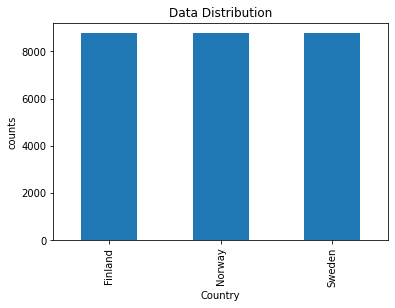

In [8]:
data.value_counts(data["country"]).plot.bar()
plt.title("Data Distribution")
plt.xlabel("Country")
plt.ylabel("counts")
plt.show()

Unique value of store column:  ['KaggleMart' 'KaggleRama']


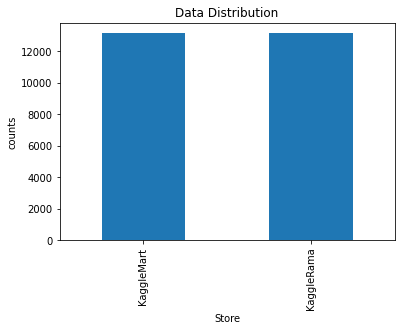

In [9]:
store = data['store'].unique()
print('Unique value of store column: ', store)


data.value_counts(data['store']).plot.bar()
plt.title('Data Distribution')
plt.xlabel('Store')
plt.ylabel('counts')

plt.show()

Unique value of product column:  ['Kaggle Mug' 'Kaggle Hat' 'Kaggle Sticker']


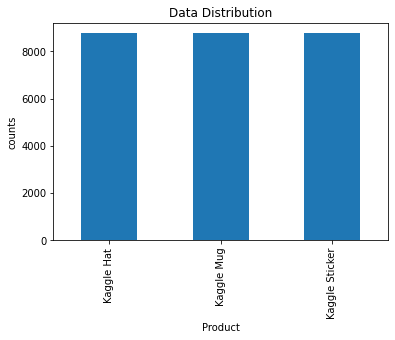

In [10]:
product = data['product'].unique()
print('Unique value of product column: ', product)

data.value_counts(data['product']).plot.bar()
plt.title('Data Distribution')
plt.xlabel('Product')
plt.ylabel('counts')

plt.show()

In [11]:
data['date'] = pd.to_datetime(data['date'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26298 entries, 0 to 26297
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      26298 non-null  datetime64[ns]
 1   country   26298 non-null  object        
 2   store     26298 non-null  object        
 3   product   26298 non-null  object        
 4   num_sold  26298 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.0+ MB


In [12]:
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26298 entries, 0 to 26297
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      26298 non-null  datetime64[ns]
 1   country   26298 non-null  object        
 2   store     26298 non-null  object        
 3   product   26298 non-null  object        
 4   num_sold  26298 non-null  int64         
 5   day       26298 non-null  int64         
 6   month     26298 non-null  int64         
 7   year      26298 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 1.6+ MB


In [13]:
data.head()

,date,country,store,product,num_sold,day,month,year
0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,1,1,2015
1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,1,1,2015
2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,1,1,2015
3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,1,1,2015
4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,1,1,2015


In [14]:
data.drop(['date'], axis = 1, inplace = True)
data.head()

,country,store,product,num_sold,day,month,year
0,Finland,KaggleMart,Kaggle Mug,329,1,1,2015
1,Finland,KaggleMart,Kaggle Hat,520,1,1,2015
2,Finland,KaggleMart,Kaggle Sticker,146,1,1,2015
3,Finland,KaggleRama,Kaggle Mug,572,1,1,2015
4,Finland,KaggleRama,Kaggle Hat,911,1,1,2015


In [15]:
from sklearn.preprocessing import LabelEncoder

le_cols = ['country', 'store', 'product']

def convert2num(X_new):

    label_encoder = LabelEncoder()

    for col in le_cols:
        X_new[col] = label_encoder.fit_transform(X_new[col])
        
    return X_new
data = convert2num(data)

data[le_cols].head()

,country,store,product
0,0,0,1
1,0,0,0
2,0,0,2
3,0,1,1
4,0,1,0


In [16]:
data.head()

,country,store,product,num_sold,day,month,year
0,0,0,1,329,1,1,2015
1,0,0,0,520,1,1,2015
2,0,0,2,146,1,1,2015
3,0,1,1,572,1,1,2015
4,0,1,0,911,1,1,2015


In [17]:
data['year'] = data['year']/ 2022

In [18]:
data.drop(['day'], axis = 1, inplace = True)
X = data.drop('num_sold', axis=1).to_numpy()
y = data['num_sold'].to_numpy()

X.shape, y.shape

((26298, 5), (26298,))

In [19]:
X[:5]

array([[0.        , 0.        , 1.        , 1.        , 0.99653808],
       [0.        , 0.        , 0.        , 1.        , 0.99653808],
       [0.        , 0.        , 2.        , 1.        , 0.99653808],
       [0.        , 1.        , 1.        , 1.        , 0.99653808],
       [0.        , 1.        , 0.        , 1.        , 0.99653808]])

In [20]:
from sklearn.model_selection import train_test_split

tf.random.set_seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21038, 5), (5260, 5), (21038,), (5260,))

In [21]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
           tf.keras.layers.Dense(500, activation='relu'),
           tf.keras.layers.Dense(250, activation='relu'),
           tf.keras.layers.Dense(100, activation='relu'),
           tf.keras.layers.Dense(10, activation='relu'), 
           tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=['MAE'])

history = model_1.fit(X_train, 
                      y_train, 
                      epochs=30,
                      verbose = 1,
                      validation_data=(X_test, y_test))


User settings:

   KMP_AFFINITY=granularity=fine,noverbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER

Epoch 1/30
658/658 [==============================] - 3s 3ms/step - loss: 113.5989 - MAE: 113.5989 - val_loss: 71.9160 - val_MAE: 71.9160
Epoch 2/30
658/658 [==============================] - 2s 3ms/step - loss: 62.1722 - MAE: 62.1722 - val_loss: 58.5813 - val_MAE: 58.5813
Epoch 3/30
658/658 [==============================] - 2s 3ms/step - loss: 57.3345 - MAE: 57.3345 - val_loss: 57.7648 - val_MAE: 57.7648
Epoch 4/30
658/658 [==============================] - 2s 3ms/step - loss: 55.3558 - MAE: 55.3558 - val_loss: 52.8487 - val_MAE: 52.8487
Epoch 5/30
658/658 [==============================] - 2s 3ms/step - loss: 54.3705 - MAE: 54.3705 - val_loss: 53.3334 - val_MAE: 53.3334
Epoch 6/30
658/658 [==============================] - 3s 4ms/step - loss: 54.2318 - MAE: 54.2318 - val_loss: 57.2645 - val_MAE: 57.2645
Epoch 7/30
658/658 [==============================] - 2s 4ms/step - loss: 53.8515 - MAE: 53.8515 - val_loss: 52.7278 - val_MAE: 52.7278
Epoch 8/30
658/658 [==========================

Text(0.5, 0, 'epochs')

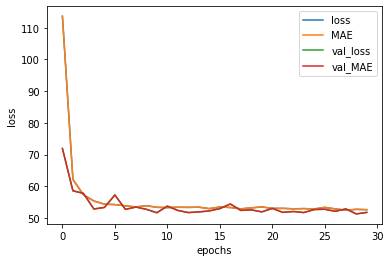

In [22]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [23]:
y_p = model_1.predict(X_test)
y_p[:5], y_test[:5]

(array([[308.8794 ],
        [194.65085],
        [289.2283 ],
        [330.9773 ],
        [470.1127 ]], dtype=float32),
 array([397, 203, 228, 316, 514]))

In [24]:
from sklearn.metrics import r2_score
r2_score(y_test, y_p)
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               3000      
_________________________________________________________________
dense_1 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               25100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 154,371
Trainable params: 154,371
Non-trainable params: 0
_________________________________________________________________


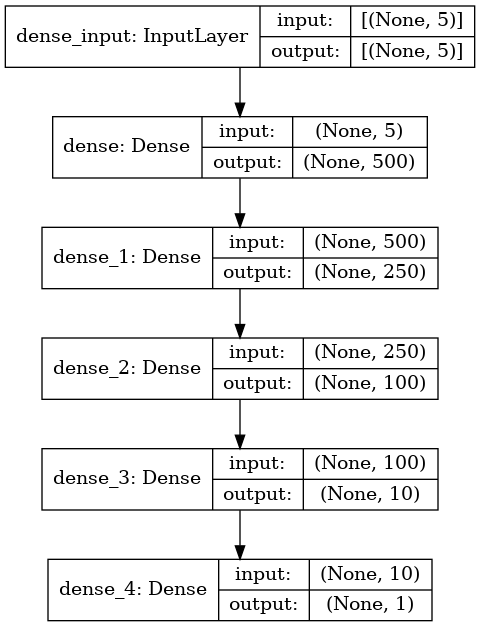

In [25]:
from tensorflow.keras.utils import plot_model

plot_model(model_1, show_shapes=True)

In [26]:
df_test =  pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/Tabular%20Playground%20Series%20-%20Jan%202022/test.csv')
test_passengerIds = df_test['row_id'].values
df_test.drop('row_id', axis = 1, inplace=True)
df_test.head()

,date,country,store,product
0,2019-01-01,Finland,KaggleMart,Kaggle Mug
1,2019-01-01,Finland,KaggleMart,Kaggle Hat
2,2019-01-01,Finland,KaggleMart,Kaggle Sticker
3,2019-01-01,Finland,KaggleRama,Kaggle Mug
4,2019-01-01,Finland,KaggleRama,Kaggle Hat


In [27]:
df_test['date'] = pd.to_datetime(df_test['date'])

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6570 entries, 0 to 6569
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     6570 non-null   datetime64[ns]
 1   country  6570 non-null   object        
 2   store    6570 non-null   object        
 3   product  6570 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 205.4+ KB


In [28]:
df_test['day'] = df_test['date'].dt.day
df_test['month'] = df_test['date'].dt.month
df_test['year'] = df_test['date'].dt.year

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6570 entries, 0 to 6569
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     6570 non-null   datetime64[ns]
 1   country  6570 non-null   object        
 2   store    6570 non-null   object        
 3   product  6570 non-null   object        
 4   day      6570 non-null   int64         
 5   month    6570 non-null   int64         
 6   year     6570 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 359.4+ KB


In [29]:
df_test.drop(['date'], axis = 1, inplace = True)
df_test.head()

,country,store,product,day,month,year
0,Finland,KaggleMart,Kaggle Mug,1,1,2019
1,Finland,KaggleMart,Kaggle Hat,1,1,2019
2,Finland,KaggleMart,Kaggle Sticker,1,1,2019
3,Finland,KaggleRama,Kaggle Mug,1,1,2019
4,Finland,KaggleRama,Kaggle Hat,1,1,2019


In [30]:
df_test = convert2num(df_test)

df_test[le_cols].head()

,country,store,product
0,0,0,1
1,0,0,0
2,0,0,2
3,0,1,1
4,0,1,0


In [31]:
df_test['year'] = df_test['year']/ 2022
df_test.head()

,country,store,product,day,month,year
0,0,0,1,1,1,0.998516
1,0,0,0,1,1,0.998516
2,0,0,2,1,1,0.998516
3,0,1,1,1,1,0.998516
4,0,1,0,1,1,0.998516


In [32]:
df_test.drop(['day'], axis = 1, inplace = True)
df_test = df_test.to_numpy()
df_test[:5]

array([[0.        , 0.        , 1.        , 1.        , 0.99851632],
       [0.        , 0.        , 0.        , 1.        , 0.99851632],
       [0.        , 0.        , 2.        , 1.        , 0.99851632],
       [0.        , 1.        , 1.        , 1.        , 0.99851632],
       [0.        , 1.        , 0.        , 1.        , 0.99851632]])

In [33]:
y_pred = model_1.predict(df_test)[:, 0]
y_pred[:5]

array([225.83614, 382.21692, 103.10862, 403.24847, 671.5956 ],
      dtype=float32)

In [34]:
y_pred = np.array(y_pred)
y_pred.shape

(6570,)

In [35]:
test_passengerIds.shape

(6570,)

In [36]:
output = pd.DataFrame({'row_id':test_passengerIds, 'num_sold': y_pred})
output.to_csv('submission.csv', index=False)
output

,row_id,num_sold
0,26298,225.836136
1,26299,382.216919
2,26300,103.108620
3,26301,403.248474
4,26302,671.595581
...,...,...
6565,32863,375.524567
6566,32864,122.814156
6567,32865,465.624023
6568,32866,647.649719
